In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pyranges as pr
import itertools
from collections import defaultdict
import os
import glob
import sys
sys.path.append("/Genomics/kocherlab/bjarnold/STARRseq/code/notebooks")
import functions as fn



In [14]:
data_dir = "MACS2_summaries/min_biorep_support_2"
fold_diff_0 = "_MACS2_peaks_qval_0_folddiff_0.txt"
fold_diff_2 = "_MACS2_peaks_qval_0_folddiff_2.txt"
to_plot = "fold_diff_0"

MACS_files_0 = glob.glob(os.path.join(data_dir, "*"+fold_diff_0))
MACS_files_2 = glob.glob(os.path.join(data_dir, "*"+fold_diff_2))


In [15]:
def read_in_dfs(files):
    dfs = []
    for f in files:
        df = pd.read_csv(f, sep=" ")
        dfs.append(df)
    return dfs  

dfs_0 = read_in_dfs(MACS_files_0)
dfs_2 = read_in_dfs(MACS_files_2)



In [16]:
# concatenate all data dramfes in dfs
def concat_dfs(dfs):
    df = pd.concat(dfs)
    df.sort_values(by=["species"], inplace=True)
    df.reset_index(inplace=True, drop=True)
    df['ratio'] = df['dedup']/df['raw']
    return df

df_0 = concat_dfs(dfs_0)
df_2 = concat_dfs(dfs_2)

print(df_0.head())
print(df_2.head())


  species     raw  dedup  Unnamed: 3     ratio
0    Aaur   44454   5278         NaN  0.118729
1    Amel   87460  44450         NaN  0.508232
2    Apur   70879  12614         NaN  0.177965
3    Avir  196973  23064         NaN  0.117092
4    Bimp  112833   7698         NaN  0.068225
  species    raw  dedup  Unnamed: 3     ratio
0    Aaur  12169   1034         NaN  0.084970
1    Amel  48120  15404         NaN  0.320116
2    Apur  20843   3321         NaN  0.159334
3    Avir  56793   6860         NaN  0.120790
4    Bimp  26252   1380         NaN  0.052567


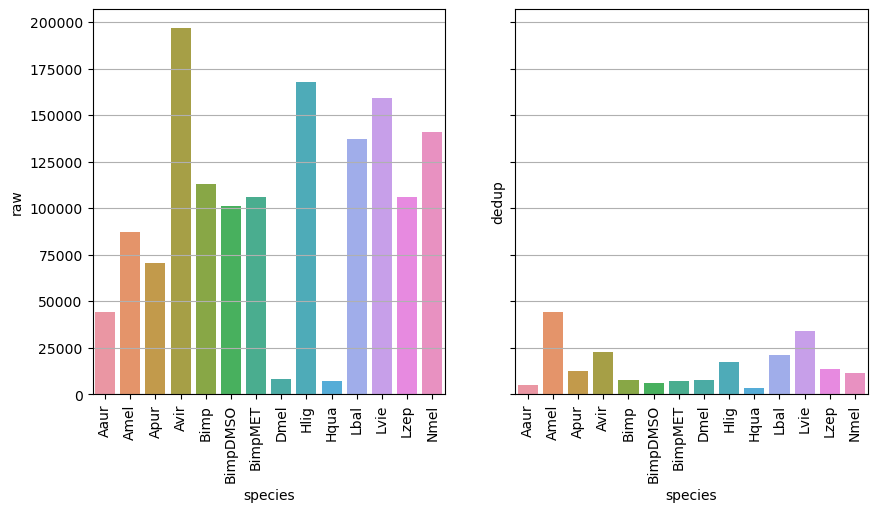

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(data=df_0, x="species", y="raw", ax = axs[0])
axs[0].yaxis.grid(True)
axs[0].tick_params(axis='x', rotation=90)
# log y axis
# axs[0].set_yscale('log')

sns.barplot(data=df_0, x="species", y="dedup", ax = axs[1])
axs[1].yaxis.grid(True)
axs[1].tick_params(axis='x', rotation=90)


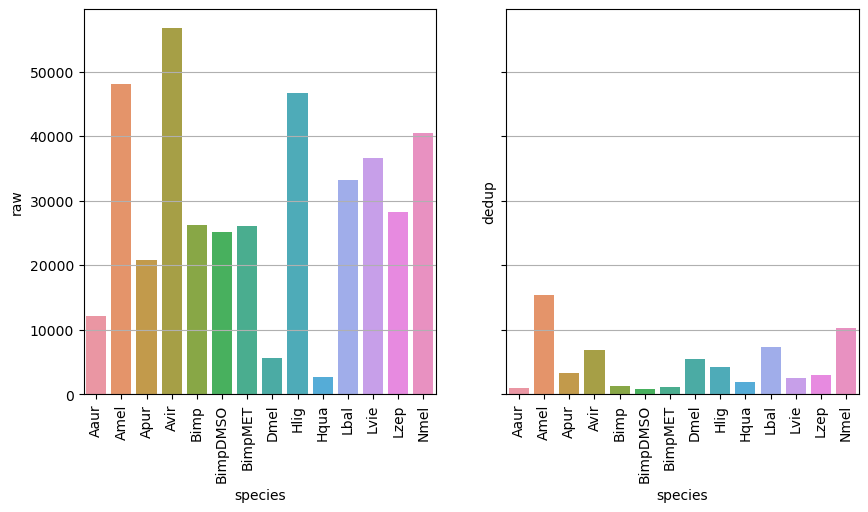

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(data=df_2, x="species", y="raw", ax = axs[0])
axs[0].yaxis.grid(True)
axs[0].tick_params(axis='x', rotation=90)
# log y axis
# axs[0].set_yscale('log')

sns.barplot(data=df_2, x="species", y="dedup", ax = axs[1])
axs[1].yaxis.grid(True)
axs[1].tick_params(axis='x', rotation=90)

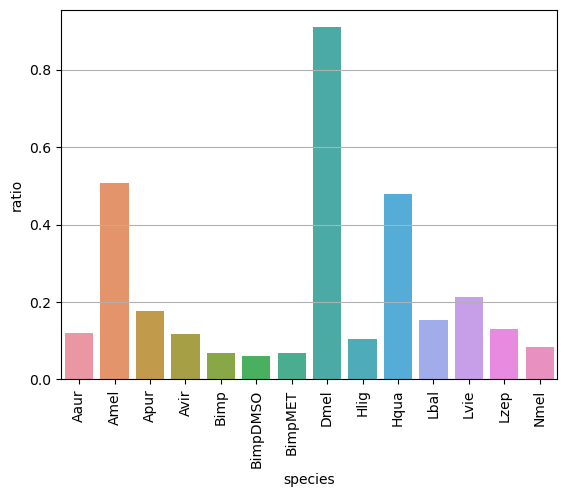

In [19]:
sns.barplot(data=df_0, x="species", y="ratio")
plt.xticks(rotation=90)
# add grid lines to y axis
plt.gca().yaxis.grid(True)



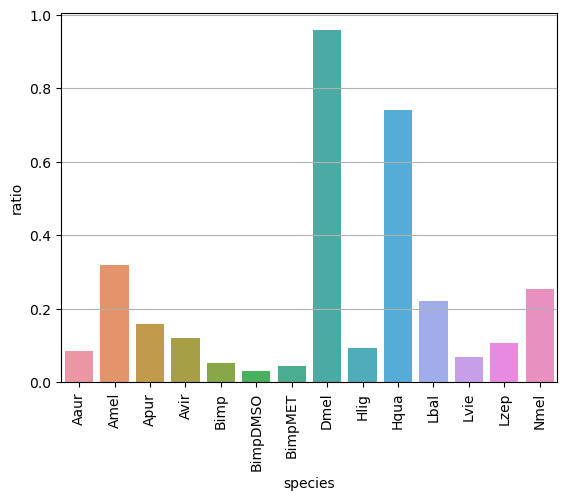

In [20]:
sns.barplot(data=df_2, x="species", y="ratio")
plt.xticks(rotation=90)
# add grid lines to y axis
plt.gca().yaxis.grid(True)

In [21]:
df_0.rename(columns={"ratio": "ratio_0", "raw": "raw_0", "dedup": "dedup_0"}, inplace=True)
df_2.rename(columns={"ratio": "ratio_2", "raw": "raw_2", "dedup": "dedup_2"}, inplace=True)

df = pd.merge(df_0, df_2, on="species")
df["raw_frac_above_2"] = df["raw_2"]/df["raw_0"]
df["dedup_frac_above_2"] = df["dedup_2"]/df["dedup_0"]

df

,species,raw_0,dedup_0,Unnamed: 3_x,ratio_0,raw_2,dedup_2,Unnamed: 3_y,ratio_2,raw_frac_above_2,dedup_frac_above_2
0,Aaur,44454,5278,NaN,0.118729,12169,1034,NaN,0.084970,0.273744,0.195908
1,Amel,87460,44450,NaN,0.508232,48120,15404,NaN,0.320116,0.550194,0.346547
2,Apur,70879,12614,NaN,0.177965,20843,3321,NaN,0.159334,0.294065,0.263279
3,Avir,196973,23064,NaN,0.117092,56793,6860,NaN,0.120790,0.288329,0.297433
4,Bimp,112833,7698,NaN,0.068225,26252,1380,NaN,0.052567,0.232662,0.179267
5,BimpDMSO,101195,6143,NaN,0.060705,25186,805,NaN,0.031962,0.248886,0.131043
6,BimpMET,105974,7187,NaN,0.067819,26082,1159,NaN,0.044437,0.246117,0.161263
7,Dmel,8347,7585,NaN,0.908710,5675,5436,NaN,0.957885,0.679885,0.716678
8,Hlig,167746,17684,NaN,0.105421,46657,4319,NaN,0.092569,0.278141,0.244232
9,Hqua,6971,3333,NaN,0.478124,2687,1989,NaN,0.740231,0.385454,0.596760


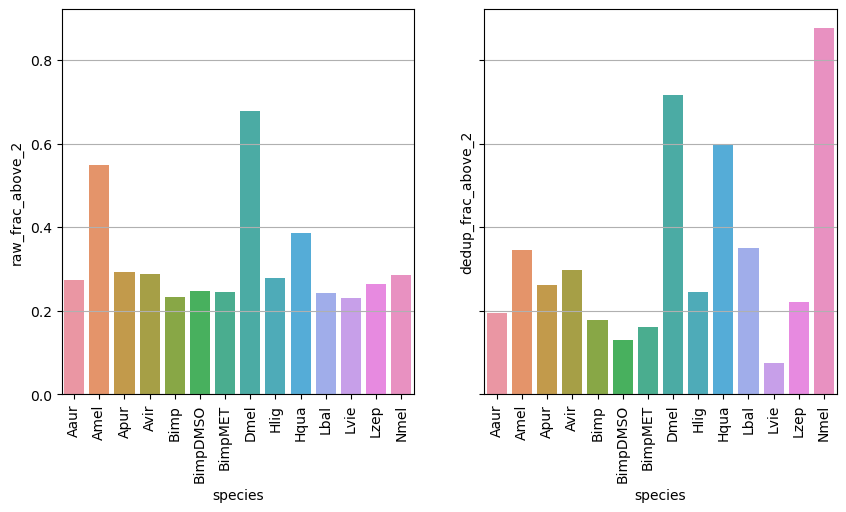

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(data=df, x="species", y="raw_frac_above_2", ax=axs[0])
# rotate x axis labels
axs[0].tick_params(axis='x', rotation=90)
# add grid lines to y axis
axs[0].yaxis.grid(True)

sns.barplot(data=df, x="species", y="dedup_frac_above_2", ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)
axs[1].yaxis.grid(True)
